# Missing data

- wine dataset
- replace 10 random "residual sugar" with Nan
- train and predict the missing values
- plot loss and true sugar vs predicted sugar

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../seaborn-data-master/winequality-red.csv', sep=';')
print(f"Data shape: {data.shape}")
data.head()

Data shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

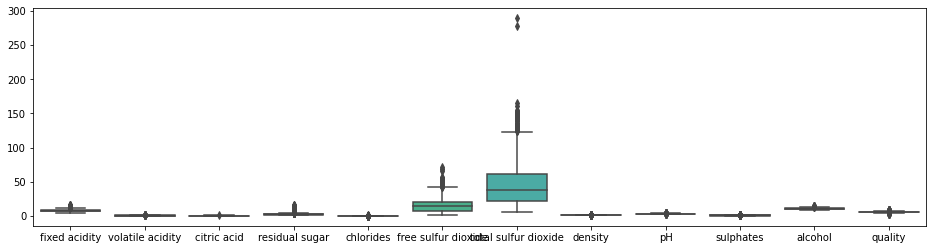

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 4))
sns.boxplot(data=data)

In [5]:
nan_vals = np.random.randint(len(data), size=(10,))
nan_data = data.loc[nan_vals]
proc_data = data.drop(data.index[nan_vals])
nan_data_labels = nan_data["residual sugar"].copy()
nan_data["residual sugar"] = np.nan
proc_data = proc_data.append(nan_data).sort_index()

In [6]:
proc_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1589.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.540938,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.413693,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data processing

In [7]:
val_proc_data = proc_data[proc_data["residual sugar"].isna()]
proc_data = proc_data.dropna()
val_proc_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
34,5.2,0.32,0.25,NaN,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5
259,10.0,0.31,0.47,NaN,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,7
416,10.6,0.48,0.64,NaN,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,6
496,7.8,0.52,0.25,NaN,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6
643,9.5,0.59,0.44,NaN,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5
644,9.9,0.54,0.45,NaN,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5
816,9.8,0.51,0.19,NaN,0.081,8.0,30.0,0.99840,3.23,0.58,10.5,6
1031,7.3,0.55,0.01,NaN,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
1233,10.2,0.23,0.37,NaN,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,4
1341,7.5,0.51,0.02,NaN,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6


In [8]:
feature_cols = list(proc_data.columns)
label_col = "residual sugar"
feature_cols.remove(label_col)
data = proc_data[feature_cols].values
labels = proc_data[label_col].values.reshape((proc_data.shape[0], 1))
val_data = val_proc_data[feature_cols].values
val_labels = nan_data_labels.values.reshape((val_proc_data.shape[0], 1))
data.shape, labels.shape

((1589, 11), (1589, 1))

In [9]:
zscaler = StandardScaler()
zscaler.fit(data)
data = zscaler.transform(data)
val_data = zscaler.transform(val_data)

In [10]:
dataT = torch.tensor(data).float()
val_dataT = torch.tensor(val_data).float()
labelsT = torch.tensor(labels).float()

data_train, data_test, labels_train, labels_test = train_test_split(dataT, labelsT, test_size=0.1)

dataset_train = TensorDataset(data_train, labels_train)
dataset_test = TensorDataset(data_test, labels_test)

batchsize  = 8
train_loader = DataLoader(dataset_train, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset_test, batch_size=dataset_test.tensors[0].shape[0])

# Train model

In [11]:
class MissingDataModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(11, 32)
        self.hidden1 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden1(x))
        return self.output(x)


def get_model():
    model = MissingDataModel()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    return model, loss_function, optimizer

In [12]:
def train_model(epochs, train_loader, test_loader):
    losses = []
    train_acc = []
    test_acc = []

    model, loss_function, optimizer = get_model()

    for _ in range(epochs):
        model.train()
        batch_losses = []
        batch_acc = []
        for X, y in train_loader:
            y_pred = model(X)
            loss = loss_function(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_acc.append(np.corrcoef(y.detach().numpy().T, y_pred.detach().numpy().T)[0, 1])
            batch_losses.append(loss.item())

        train_acc.append(np.mean(batch_acc))        
        losses.append(np.mean(batch_losses))        
        
        model.eval()
        X, y = next(iter(test_loader))
        with torch.no_grad():
            y_pred = model(X)
        test_acc.append(np.corrcoef(y.detach().numpy().T, y_pred.detach().numpy().T)[0, 1])

    return model, losses, train_acc, test_acc

In [13]:
# for i in range(10):
#     epochs = 100
#     model, losses, train_acc, test_acc = train_model(epochs, train_loader, test_loader)
#     print(f"Model instance {i}, final train/test accuracies: {100*train_acc[-1]:1f}%, {100*test_acc[-1]:1f}%")

In [14]:
model, losses, train_acc, test_acc = train_model(200, train_loader, test_loader)
print(f"Model final train/test accuracies: {100*train_acc[-1]:1f}%, {100*test_acc[-1]:1f}%")

Model final train/test accuracies: 86.618164%, 85.624277%


In [15]:
y_train_pred = model(dataT)
y_val_pred = model(val_dataT)

Validation data accuracy: -0.3787678191129522


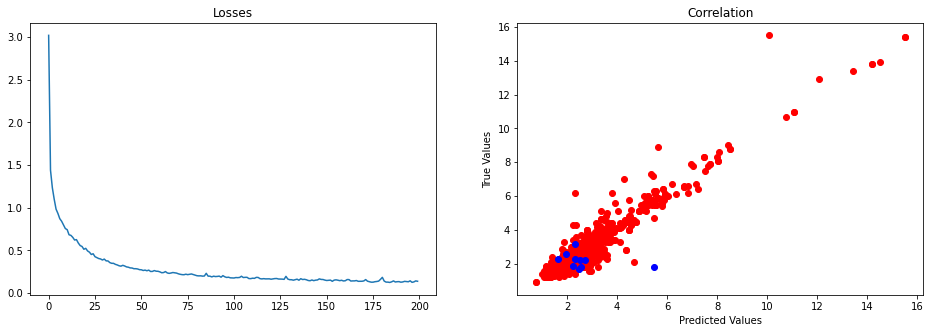

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(losses)
ax1.set_title("Losses")
ax2.scatter(y_train_pred.detach().numpy(), labels, c='r')
ax2.scatter(y_val_pred.detach().numpy(), val_labels, c='b')
ax2.set_title("Correlation")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("True Values")

print(f"Validation data accuracy: {np.corrcoef(y_val_pred.detach().numpy().T, val_labels.T)[0, 1]}")